# Linear Regression as Predictive Model for Healthcare Insurance

# Description:
###  It is no surprise that healthcare insurance is expensive. It is the public perception that the rate/charges is determined by many factors, such as age, gender, smoking status, occupation, and so forth. It is essential to understand what factors affect the rates/charges to make informed decision. 

# Project Objective:
### This interesting project will use linear regression model in the sklearn library to predict the charges. Thus, the target feature or y-variable is "charges".

# Process:
### The project will start off with basic descriptive analysis, followed by detailed exploratory data analysis, data visualization on features, and data cleansing. The cleansed data will be scaled and fit to the model. Evaluation of the model included MAE, MSE, and RMSE. Last, a basic description of the coefficient as conclusion. 

# Potential Impact
### As a consumer, it is beneficial to understand which factor carries more weight and have more impact on the charges. This can help patients to make informed decision. As for insurance companies, it helps to have a deeper understand their target audience and improve strategy on policy/coverage. Knowledge on specific population can help identify potential opportunities, such as population health, preventive health measures promotion, and so forth. This ultimately can have a positive impact on profitability. 

### Importing libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
data = pd.read_csv("../input/insurance/insurance.csv")

In [44]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
len(data)

1338

### This is a relatively small dataset with only ~1300 observations. Noted that we have a mixture of datatypes to work on.

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### The following is basic yet important information on the dataset. Noted that the feature "charges" will be our y-variable. The min value is only ~1200 and max at ~63000 with std deviation ~12000. This data has extreme valuee that could affect the model later on. 

In [47]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Data Analysis
### A quick way to visualize the correlation between features. 

<Figure size 864x504 with 0 Axes>

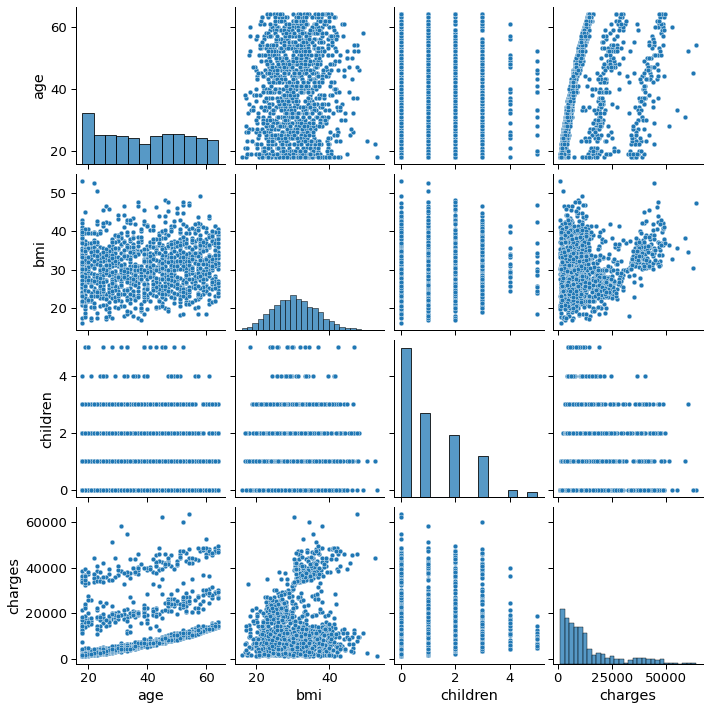

In [48]:
plt.figure(figsize=(12,7))
sns.pairplot(data)

### Diving into features

In [49]:
data["sex"].value_counts(normalize=True)*100

male      50.523169
female    49.476831
Name: sex, dtype: float64

### The gender feature is ~50%, which does not explain a whole lot. Noted that this feature is object data type. Will map this into a binary classification. 

In [50]:
data["sex"] = data["sex"].map({"male": 1, "female": 0})

In [51]:
data["sex"].value_counts()

1    676
0    662
Name: sex, dtype: int64

### Features, such as smoker and region also are object data type. Similarly, it will be converted into binary classification. 

In [52]:
data.select_dtypes(object).columns

Index(['smoker', 'region'], dtype='object')

In [53]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [54]:
data["smoker"] = data["smoker"].map({"yes": 1, "no": 0})

### About 20% of the people are smokers. 

In [55]:
data["smoker"].value_counts(normalize=True)*100

0    79.521674
1    20.478326
Name: smoker, dtype: float64

Text(0, 0.5, 'Number of People')

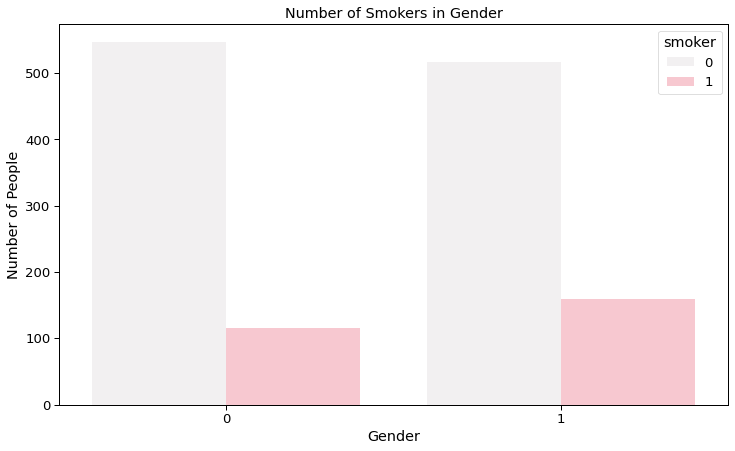

In [56]:
plt.figure(figsize=(12,7))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x="sex", color="pink", data=data, hue="smoker")
plt.title("Number of Smokers in Gender")
plt.xlabel("Gender")
plt.ylabel("Number of People")

### About 23% are male smokers and 17% are female. 

In [57]:
gender_gb = data.groupby("sex")["smoker"].value_counts(normalize=True)*100
gender_gb 

sex  smoker
0    0         82.628399
     1         17.371601
1    0         76.479290
     1         23.520710
Name: smoker, dtype: float64

In [58]:
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### Noted that regions have 4 variables. These will be converted into numeric classes using dummies technique. 

In [59]:
region_dummy = pd.get_dummies(data["region"], prefix="region_", drop_first=True, dtype=int)
region_dummy

,region__northwest,region__southeast,region__southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


### Dropping the original "region" feature since feature-engineering completed. 

In [60]:
data = pd.concat([data, region_dummy], axis=1)
data = data.drop("region", axis=1)

In [61]:
data.head()

,age,sex,bmi,children,smoker,charges,region__northwest,region__southeast,region__southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


### It is time to dive into the "charges" feature. Recalling the mean, std, and max values have large gaps. This is visualized using a simple distplot. 

In [62]:
data["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

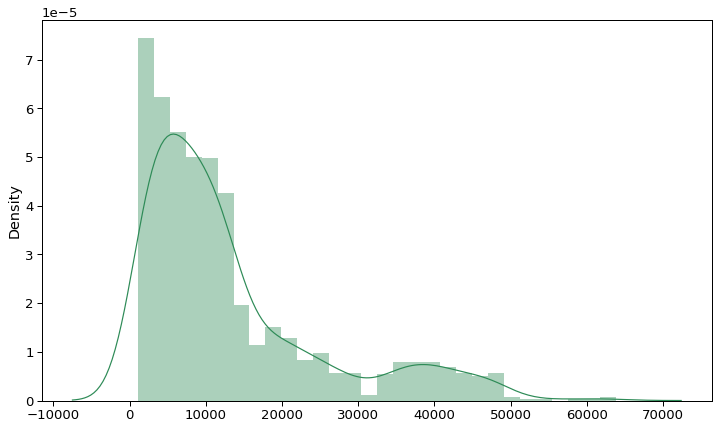

In [63]:
plt.figure(figsize=(12,7))
sns.distplot(x=data["charges"], bins=30, color="seagreen")

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1338 non-null   int64  
 1   sex                1338 non-null   int64  
 2   bmi                1338 non-null   float64
 3   children           1338 non-null   int64  
 4   smoker             1338 non-null   int64  
 5   charges            1338 non-null   float64
 6   region__northwest  1338 non-null   int64  
 7   region__southeast  1338 non-null   int64  
 8   region__southwest  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


### Preparing to scale the data using MinMaxScaler from sklearn library

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

### Creating variables for X and y. The data is ready for to be split for train and test set. 

In [67]:
X = data.drop("charges", axis=1)
y = data["charges"]

In [68]:
from sklearn.model_selection import train_test_split

### The test size will be set as 30% as usual. The random_state will be used and set at 42, which is arbitrary, so the random sample will be the same each time. 

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### The data is scaled using the MinMaxScaler. Noted that fit_transform is not used on X_test to prevent leakage.

In [70]:
scaled_data = scaler.fit_transform(X_train, y_train)
scaled_test = scaler.transform(X_test)

### Importing the linear regression from the sklearn library. The scaled data will be fit to the model. 

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
linear_model = LinearRegression()

In [73]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [74]:
linear_predict = linear_model.predict(X_test)

### After prediction is complete, it is time to evaluate the model. 

In [75]:
from sklearn import metrics

In [76]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, linear_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, linear_predict))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, linear_predict)))

Mean Absolute Error:  4145.450555627585
Mean Squared Error:  33780509.57479163
Root Mean Squared Error:  5812.10027225887


### Our model's performance is evaluated by MAE, MSE, and RMSE. Recall that the charges mean is ~13000 and std deviation ~12000. The scatterplot below shows our model's prediction against the actual charges. It shows a linear relationship with lots of noise, likely due to outliers and extreme values in charges. From the graph, it is reasonable to describe that the model does not do well in predicting outliers and extreme values. 

Text(0, 0.5, 'Prediction')

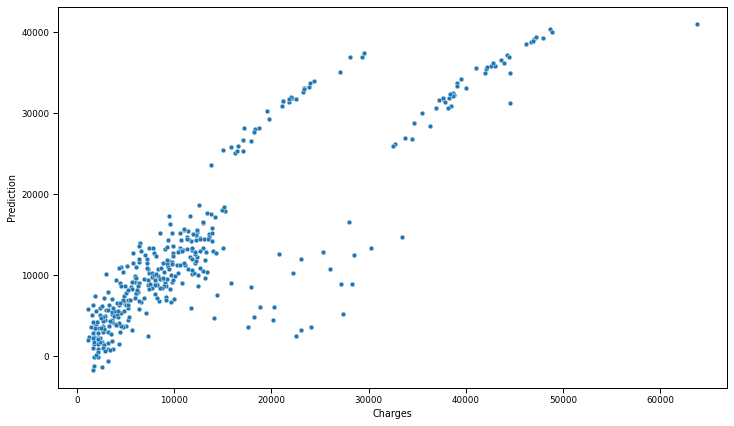

In [77]:
plt.figure(figsize=(12,7))
sns.set_context("paper", font_scale=1)
sns.scatterplot(x=y_test, y=linear_predict)
plt.xlabel("Charges")
plt.ylabel("Prediction")

Text(0, 0.5, 'Prediction')

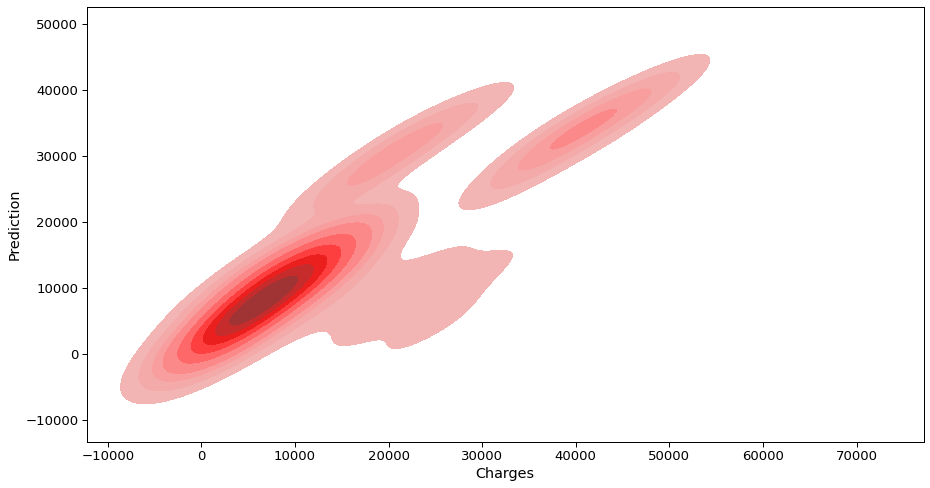

In [78]:
plt.figure(figsize=(15,8))
sns.set_context("paper", font_scale=1.5)
sns.kdeplot(x=y_test, y=linear_predict, fill=True, color="red")
plt.xlabel("Charges")
plt.ylabel("Prediction")

In [79]:
print("Metrics Variance Score:", metrics.explained_variance_score(y_test, linear_predict))

Metrics Variance Score: 0.7697826609639536


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual: Y_test - Prediction')

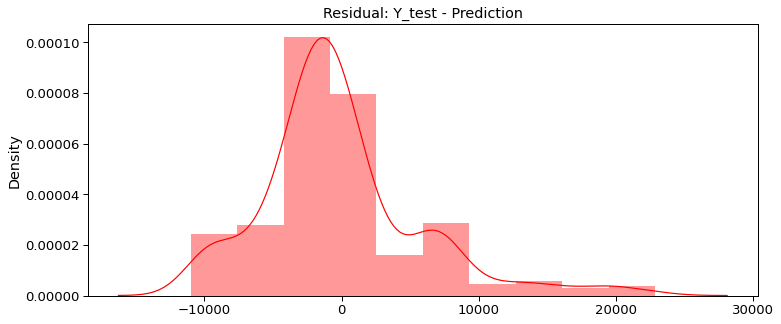

In [80]:
plt.figure(figsize=(12,5))
sns.set_context("paper", font_scale=1.5)
sns.distplot(x=y_test-linear_predict, bins=10, color="red")
plt.title("Residual: Y_test - Prediction")

In [81]:
linear_model.coef_

array([  261.29692414,   104.81182299,   348.90691516,   424.11912829,
       23628.36722236,  -486.93461047,  -970.96883857,  -926.32290791])

### Setting up the features' coefficients. 

In [82]:
linear_coef = pd.DataFrame(linear_model.coef_, X.columns, columns=["Coefficient"])
linear_coef.sort_values("Coefficient", ascending=False)

,Coefficient
smoker,23628.367222
children,424.119128
bmi,348.906915
age,261.296924
sex,104.811823
region__northwest,-486.934610
region__southwest,-926.322908
region__southeast,-970.968839


### Given others are constant, the charges will increase by ~$23600 for every 1 unit inncrease in smoker. 
### The second most important factor is children, followed BMI and age. Apparently, gender does not affect much. 
### As expected, the model describes that smoker plays an important factor in determining the insurance charges. 